In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib 
import warnings
warnings.filterwarnings("ignore")

In [189]:
X = joblib.load('train_data_2.pkl')

In [190]:
y = pd.read_csv(r'src\data\data_ML\train_labels.csv', header=None)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [192]:
print(X.shape)
print(y.shape)

(3750, 7274)
(3750, 1)


In [193]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy = dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)


In [194]:
def classification(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
        
    #Classification report
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_test, y_pred))
    
    
    #Plotting the normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
    matrix.plot()
    plt.show()
    
    
    
    

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        77
           1       0.90      1.00      0.95       673

    accuracy                           0.90       750
   macro avg       0.45      0.50      0.47       750
weighted avg       0.81      0.90      0.85       750



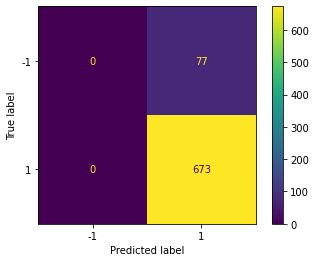

In [195]:
classification(dummy_clf, X_train, y_train, X_test, y_test)

In [196]:
y_train.value_counts(normalize=True)
# We clearly have a class imbalance problem
# To address this we can SMOTE the training data and see 
# if training a model with this method would improve our results.

 1    0.900667
-1    0.099333
dtype: float64

In [197]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts(normalize=True)

 1    0.5
-1    0.5
dtype: float64

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

          -1       0.11      0.56      0.18        77
           1       0.90      0.47      0.62       673

    accuracy                           0.48       750
   macro avg       0.50      0.51      0.40       750
weighted avg       0.82      0.48      0.57       750



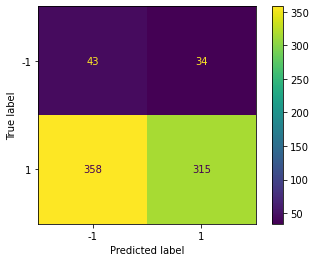

In [198]:
clf_dummy_sm = DummyClassifier()
clf_dummy_sm.fit(X_train, y_train)

classification(clf_dummy_sm, X_train_sm, y_train_sm, X_test, y_test)

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        77
           1       0.90      1.00      0.95       673

    accuracy                           0.90       750
   macro avg       0.45      0.50      0.47       750
weighted avg       0.81      0.90      0.85       750



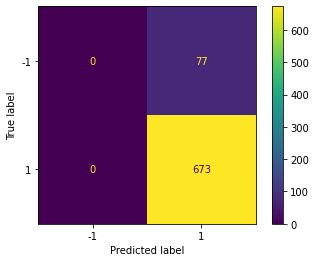

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


rfc_clf = RandomForestClassifier(random_state = 42, class_weight='balanced')
rfc_clf.fit(X_train, y_train)

classification(rfc_clf, X_train, y_train, X_test, y_test)

In [202]:
print(rfc_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


lo_clf = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', multi_class='auto', max_iter=1000)
lo_clf.fit(X_train, y_train)

classification(lo_clf, X_train, y_train, X_test, y_test)